In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import lite
from sklearn.preprocessing import StandardScaler


In [ ]:
np.random.seed(42)
temperature = np.random.uniform(low=0, high=100, size=(1000, 1))
fan_speed = 2 * temperature + np.random.normal(loc=0, scale=5, size=(1000, 1))

In [ ]:
# Print the first 10 rows of the dataset
print("Temperature | Fan Speed")
print("------------------------")
for temp, speed in zip(temperature[:10], fan_speed[:10]):
    print(f"{temp[0]:.2f}        | {speed[0]:.2f}")


Temperature | Fan Speed
------------------------
37.45        | 75.80
95.07        | 183.47
73.20        | 148.30
59.87        | 122.78
15.60        | 34.00
15.60        | 36.60
5.81        | 15.79
86.62        | 175.53
60.11        | 119.87
70.81        | 133.31


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(temperature, fan_speed, test_size=0.2, random_state=42)


In [ ]:
# Standardize features (optional but can be helpful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a linear regression model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=100, verbose=0)

In [ ]:
# Convert the Keras model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Save the TensorFlow Lite model
open('fan_speed_model.tflite', 'wb').write(tflite_model)

1080

In [ ]:
model = LinearRegression()
model.fit(temperature, fan_speed)

LinearRegression()

In [ ]:
w0 = model.intercept_
w1 = model.coef_[0]

print(f'Intercept (w0): {w0}')
print(f'Slope (w1): {w1}')

Intercept (w0): [0.87390129]
Slope (w1): [1.99226074]


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
accuracy = 1 - (mse / np.var(y_test))
print(f"Accuracy on the test set: {accuracy:.2%}")

Accuracy on the test set: 99.36%


In [ ]:
import matplotlib.pyplot as plt

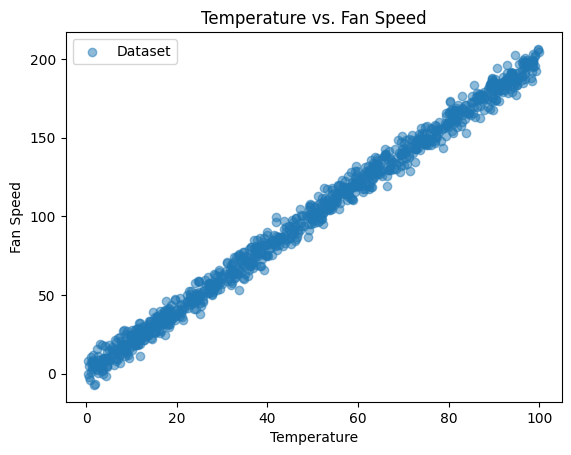

In [ ]:
# Scatter plot of the entire dataset
plt.scatter(temperature, fan_speed, alpha=0.5, label='Dataset')
plt.title('Temperature vs. Fan Speed')
plt.xlabel('Temperature')
plt.ylabel('Fan Speed')
plt.legend()
plt.show()

In [ ]:
# Print regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 21.42
R-squared (R2): 0.99
